In [10]:
import torch
import matplotlib.pyplot as plt

from src.Transformer import KernelAttention as KA

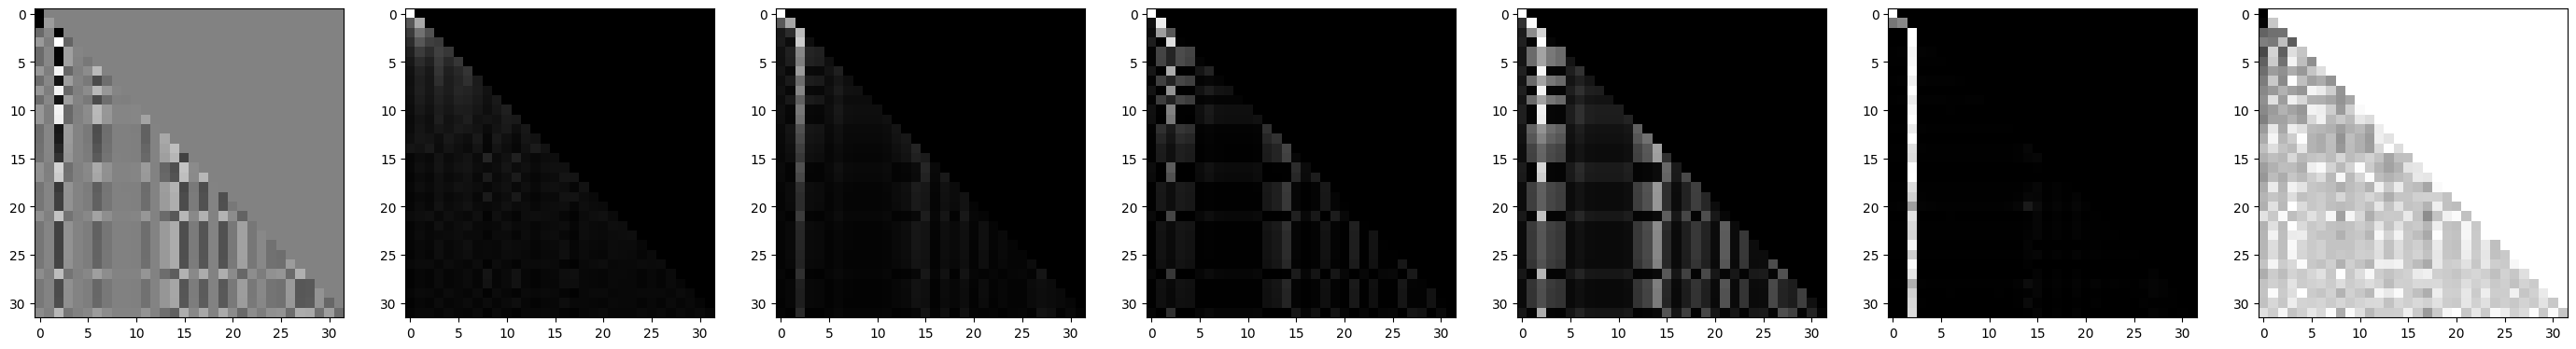

In [17]:
B, n_H, S, D = 1, 1, 32, 1

q = torch.randn(B, n_H, S, D)
k = torch.randn(B, n_H, S, D)
v = torch.randn(B, n_H, S, D)

mask = torch.tril(torch.ones((S, S)), diagonal=0)

attns = [
    KA.LinearKernelAttention(),
    KA.SEKernelAttention(),
    KA.PeriodicKernelAttention(period=10),
    KA.LocallyPeriodicKernelAttention(period=10),
    KA.RationalQuadraticKernelAttention(),
    KA.ImplicitKernelAttention(),
    KA.ChangePointKernelAttention(period=10)
]

fig, axes = plt.subplots(1, len(attns), figsize=(len(attns)*5, 5))

for ax, attn in zip(axes, attns):
    _ = attn(q, k, v, mask)
    ax.imshow(attn.attention_weight.detach().squeeze(), cmap='gray')